<a href="https://colab.research.google.com/github/ttknguyen/CS114.L22.KHCL/blob/master/hand_written_digits_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Bài tập colab số 1: Hand-written digits recognition**
**Thành viên:**
*   Thái Trần Khánh Nguyên - 19520188
*   Nguyễn Khánh Như - 19520209
*   Đoàn Nguyễn Nhật Quang - 19520235

<a name="cell-id"></a>
# **Mục 1:** Hand-written_digits_training


## Import libraries

Đầu tiên ta cần thêm vào các thư viện cần thiết cho bài toán Hand-written digits

In [ ]:
print(__doc__)
import matplotlib.pyplot as plt
from sklearn import datasets, svm, metrics
from sklearn.model_selection import train_test_split
import cv2 as cv
from google.colab.patches import cv2_imshow
import numpy as np
from google.colab import drive
import os
from sklearn.metrics import accuracy_score

Automatically created module for IPython interactive environment


Kết nối với drive của nhóm để lưu hình chụp và lấy hình khi cần thiết

In [ ]:
drive.mount('/gdrive')

Mounted at /gdrive


In [ ]:
dir_monhoc = '/gdrive/MyDrive/MachineLearning/CS114.L22.KHCL'
dir_baitap = os.path.join(dir_monhoc, 'Check')

## Digits dataset

Bộ dữ liệu về chữ số dưới đây là tập hợp của các ảnh với kích thước 8x8.
*   Thuộc tính "images" là 1 tập hợp của các mảng có kích thước 8x8 mang các "grayscale values" cho mỗi ảnh. Các mảng này được dùng để "visualize" hình ảnh của các chữ số.
*   Thuộc tính "target" của bộ dữ liệu lưu trữ giá trị chữ số mà mỗi hình ảnh đại diện.



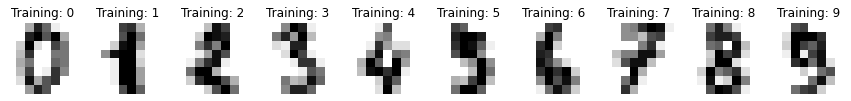

In [ ]:
digits = datasets.load_digits()

_, axes = plt.subplots(nrows=1, ncols=10, figsize=(15, 3))
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title('Training: %i' % label)

## Classification

Để áp dụng mô hình phân lớp cho bộ dữ liệu, chúng ta cần phải "flatten the images" bằng cách chuyển từng mảng 2-D mang các "grayscale values" từ ma trận (8, 8) sang ma trận (64, ). Ta được bộ dữ liệu có dạng (n_samples, n_features):
* n_samples: số lượng hình ảnh.
* n_features: tổng số pixels của từng hình ảnh.

Chúng ta có thể chia dữ liệu thành 2 phần: train subsets và test subsets sao cho phù hợp với "support vector classifier" trên "train samples".

➔ Bộ phân loại phù hợp sẽ được dùng để dự đoán giá trị chữ số cho các mẫu trong tập test subsets.

In [ ]:
# flatten the images
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

# Create a classifier: a support vector classifier
clf = svm.SVC(gamma=0.001)

# Split data into 50% train and 50% test subsets
X_train, X_test, y_train, y_test = train_test_split(
    data, digits.target, test_size=0.5, shuffle=False)

# Learn the digits on the train subset
clf.fit(X_train, y_train)

# Predict the value of the digit on the test subset
predicted = clf.predict(X_test)

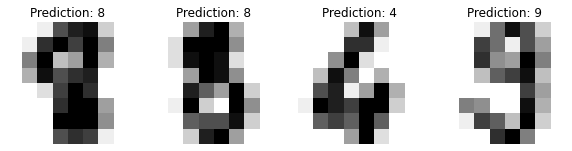

In [ ]:
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, prediction in zip(axes, X_test, predicted):
    ax.set_axis_off()
    image = image.reshape(8, 8)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title(f'Prediction: {prediction}')

In [ ]:
print(f"Classification report for classifier {clf}:\n"
      f"{metrics.classification_report(y_test, predicted)}\n")

Classification report for classifier SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False):
              precision    recall  f1-score   support

           0       1.00      0.99      0.99        88
           1       0.99      0.97      0.98        91
           2       0.99      0.99      0.99        86
           3       0.98      0.87      0.92        91
           4       0.99      0.96      0.97        92
           5       0.95      0.97      0.96        91
           6       0.99      0.99      0.99        91
           7       0.96      0.99      0.97        89
           8       0.94      1.00      0.97        88
           9       0.93      0.98      0.95        92

    accuracy                           0.97       899
   macro avg       0.97      0.97      0.97       899
weighted a

Confusion matrix:
[[87  0  0  0  1  0  0  0  0  0]
 [ 0 88  1  0  0  0  0  0  1  1]
 [ 0  0 85  1  0  0  0  0  0  0]
 [ 0  0  0 79  0  3  0  4  5  0]
 [ 0  0  0  0 88  0  0  0  0  4]
 [ 0  0  0  0  0 88  1  0  0  2]
 [ 0  1  0  0  0  0 90  0  0  0]
 [ 0  0  0  0  0  1  0 88  0  0]
 [ 0  0  0  0  0  0  0  0 88  0]
 [ 0  0  0  1  0  1  0  0  0 90]]


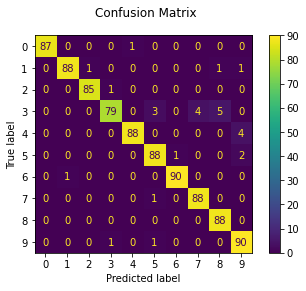

In [ ]:
disp = metrics.plot_confusion_matrix(clf, X_test, y_test)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")
 
plt.show()

<a name="cell-id2"></a>
# **Mục 2:** Accessing webcam


In [ ]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

<IPython.core.display.Javascript object>

Saved to photo.jpg


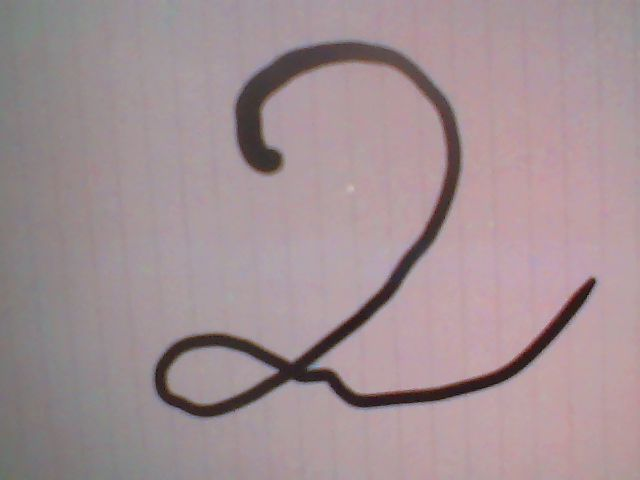

In [ ]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))
  
  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

<a name="cell-id4"></a>
# **Mục 3:** Preprocessing Image

- Để có thể tập trung vào con số trong bức ảnh để mô hình có thể nhận diện chính xác hơn, nhóm chúng em sẽ cắt bỏ những phần không cần thiết cũng như những phần gây nhiễu. 
- Hàm detectDegit xây dựng như sau:
  1.   Tìm các điểm có giá trị 255 có vị trí cao nhất và thấp nhất
  2.   Tìm các điểm có gì trị 255 có vị trí trái cùng và phải cùng
  3.   Cắt bỏ hình theo bốn điểm vừa tìm phía trên
- Ví dụ với hình sau: 




In [ ]:
def detectDigit(img):
  u, b, l, r = len(img), 0, len(img[0]), 0
  for j in range(len(img[0])): 
    for i in range(len(img)):
      if (img[i][j] == 255): u, b, l, r = min(i, u), max(i, b), min(j, l), max(j, r)
  u, b, l, r = max(0, u-5), min(b+5, len(img)), max(0, l-5), min(r+5, len(img[0]))
  return img[u:b, l:r]

- Nhằm tăng độ chính xác khi nhận diện số thì nhóm em đưa hình về dạng chỉ còn 2 màu là trắng ( Màu của chữ) và đen (background). Do tránh nhận dạng nhầm các chi tiết nhiễu trong hình.

- Nhóm em xây dựng hàm để chuẩn hóa màu của hình lại như sau:
  1. Những phần tử màu nào có mức sáng lớn hơn 90 sẽ trở thành background - giá trị  = 0
  2. Những phần tử còn lại sẽ là chữ số cần nhận diện nên có giá trij bằng 255




In [ ]:
def ChuanHoaMau(img):
  for i in range(len(img)):
    for j in range(len(img[0])):
      if (img[i][j] < 90):
        img[i][j] = 255
      else: img[i][j] = 0
  return img

- Vậy sau khi một hình ảnh được chụp lại bằng webcam sau khi qua các bức tiền xử lý sẽ có các đặc điểm:
  * Được crop bỏ các chi tiết thừa và gây nhiễu tập trung vào chữ số cần nhận diện
  * Chỉ gồm 2 màu trắng (màu chữ) và đen (màu nền) 

# **Mục 4:** Experiments

## Testing model

Ở cell này nhóm em thực hiện việc đọc ảnh ở mode grayscale và thực hiện các bước tiền xử lý ảnh.

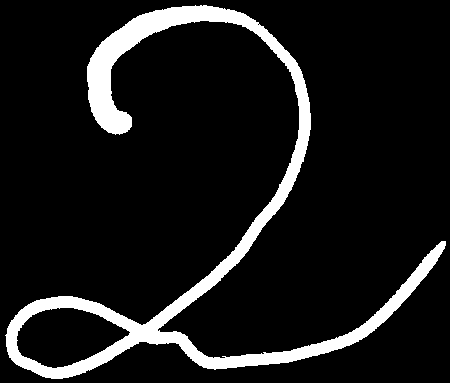

In [ ]:
image = cv.imread(filename, 0)
image = detectDigit(ChuanHoaMau(image))
cv2_imshow(image)

Sau khi qua bước tiền xử lý ảnh, để có thể ứng dụng vào mô hình ở
[Mục 1](#cell-id) chúng ta cần:
  * Đưa ảnh về size 8x8
  * Chuyển các giá trị trong mảng về khoảng 0-16. Do mỗi điểm ảnh có giá trị cao nhất là 255 nên ta sẽ chia mỗi phần tử cho 16 để đưa về dạng chuẩn.
  * Reshape ảnh về (1,64)

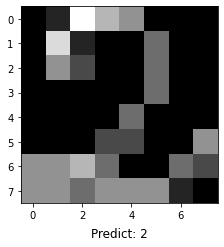

In [ ]:
plt.figure(figsize=(12,4.5))
plt.subplot(131)

imageResize = image // 16 
imageResize = cv.resize(imageResize, (8, 8), interpolation = cv.INTER_AREA)

plt.imshow(imageResize, cmap = 'gray', interpolation='nearest')
plt.title("Predict: " + str(*clf.predict(imageResize.reshape(1, 64))), y = -0.2)

plt.show()

## Check

- Nhóm em sẽ thực hiện kiểm tra với nhiều hình ảnh khác nhau để kiểm chứng độ chính xác của mô hình trong thực tế.

- Chụp hình các chữ số viết tay bằng webcam, số sẽ được chụp ở nhiều vị trí khác nhau, có một vài ảnh chứa chi tiết gây nhiễu.
- Đồng thời lấy thêm một vài ảnh từ webcam của máy khác, điện thoại để tăng tính đa dạng cho dữ liệu,
- Folder data: [Link data](https://drive.google.com/drive/folders/1Q5iE--fdPPzTenfNKVrglsB2tDCgWnVv?usp=sharing)

In [ ]:
from IPython.display import Image
for i in range(50):
  try:
    path_file = os.path.join(dir_baitap, 'photo' + str(i) + '.jpg')
    filename = take_photo(path_file)
    #print('Saved to {}'.format(filename))
  except Exception as err:
    print(str(err))

- Thực hiện việc đánh nhãn cho các hình đã được chụp ở trên để kiểm tra với việc dự đoán của máy

In [ ]:
labels = [1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 2, 3, 7, 1, 4, 5, 0, 9, 2, 3, 
          4, 9, 1, 4, 6, 0, 0, 4, 2, 5, 6, 9, 1, 0, 7, 2, 3, 4, 8, 8, 
          9, 2, 2, 9, 8, 8, 4, 3, 2, 1, 4, 2, 5, 4, 6, 1, 0, 7, 4, 3, 
          8, 9, 2, 2, 2, 1, 7, 9, 0, 3, 3, 1, 4, 2, 1, 2, 1, 7, 8, 9, 
          3, 1, 0, 5, 4, 2, 5, 7, 5, 4, 2, 1, 7, 1, 5, 2, 3, 3, 1, 2]

- Nhận diện các ảnh đã chụp lưu kết quả vào predicted

In [ ]:
predicted = []
image = []
for i in range(100):
  path_file = os.path.join(dir_baitap, "photo" + str(i) + ".jpg")
  image.append(cv.imread(path_file, 0))
  image[i] = detectDigit(ChuanHoaMau(image[i]))
  image[i] = cv.resize(image[i], (8, 8)) // 16
  predicted.append(*clf.predict(image[i].reshape(1, 64)))

- So sánh kết quả thu được với labels

In [18]:
print( str(accuracy_score(labels,predicted)*100) + "%")

42.0%


# Q & A 

**Yêu cầu phân tích: Thông qua thực nghiệm chạy thử nhiều lần trả lời các câu hỏi sau**



* Kết quả chạy thực tế với webcam của laptop và giấy viết tay của các bạn có tốt không?

> => Kết quả thu được có độ chính xác khá thấp

* Dựa vào đâu để kết luận là tốt hay không?

> => Dựa vào accuracy thu được khi nhận diện các hình ảnh chụp được. Tỉ lệ nhận diện đúng chữ số khá thấp - 42%

* Nếu không tốt thì lý do tại sao?

> => Do nhiều yếu tố dẫn đến kết quả như vậy:
  * Chất lượng của webcam
  * Chữ số trong bức ảnh chưa được chuẩn
  * Dataset dùng để train còn khá đẹp
  * Phần preprocessing còn nhiều hạn chế để lọc nhiễu và ảnh sau khi resize về 8x8 chưa chuẩn

* Nếu tốt thì tiếp theo có thể dùng model digits recognition này vào các bài toán phức tạp hơn như nhận dạng biển số nhà không?

> => Theo nhóm em nghĩ, nếu mô hình trên chạy kết quả thực nghiệm có kết quả khả quan thì có thể ứng dụng được vào các bài toán phức tạp hơn như nhận dạng biển số nhà. Do khi máy đã có thể nhận diện được chính xác chữ viết tay thì có thể dêx dàng nhận diện được các chữ số được in lên biển số nhà vì những chữ số ấy có form chuẩn hơn chữ viết tay.
